## Case Study 2: How Can a Wellness Technology Company Play It Smart?

**Business task:** What are some trends in smart device usage? How could these trends apply to Bellabeat customers? How could these trends help influence Bellabeat marketing strategy?

**Data used:** Fitabase Data on Kaggle

### Questions: 
1. If normal BMI is related to better sleep
2. Activity level during the day related to sleep during the night

**Answers to this questions could potentially guide the marketing efforts:**
1. Promote active lifestyles as a way to keep BMI within normal ranges 
2. Promote the active lifestyles as a way to reduce stress and have a better quality sleep

**Started exploring weight and BMI data, realized that this question can not be addressed with the given data.**

Having reviewed the weightLogInfo_merged.csv file in google spreadsheets, applying COUNTUNIQUE it is visible that there are only 8 unique IDs. The sample is too small to make any decisions upon it's analysis. 

One of the reasons why the data is so limited - it requires manual input of data. If the app connected to smart-scales it would be easier for users and the data became more representative. 

**Hence, we go with exploring of correlation between activity and better sleep patterns.**

In [48]:
library(tidyverse)

Lets import data using read.csv

In [49]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minutes_sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  StepTotal = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double

In [59]:
summary_filtered_steps <- daily_steps %>% 
  filter(StepTotal > 0) %>% 
  group_by(Id) %>% 
  summarize(sum_steps = sum(StepTotal), avg_steps = mean(StepTotal), number_step_entries = length(StepTotal))
  summary_filtered_steps$step_level = case_when(
      summary_filtered_steps$avg_steps >= 10000 ~ "High Activity",
      summary_filtered_steps$avg_steps >= 5000 ~ "Moderate Activity",
      summary_filtered_steps$avg_steps >= 1000 ~ "Low Activity",
      summary_filtered_steps$avg_steps < 1000 ~ "Sedentary"
    )

head(summary_filtered_steps)

Id,sum_steps,avg_steps,number_step_entries,step_level
<dbl>,<dbl>,<dbl>,<int>,<chr>
1503960366,375619,12520.633,30,High Activity
1624580081,178061,5743.903,31,Moderate Activity
1644430081,218489,7282.967,30,Moderate Activity
1844505072,79982,3808.667,21,Low Activity
1927972279,28400,1670.588,17,Low Activity
2022484408,352490,11370.645,31,High Activity


In [65]:
summary_sleep <- daily_sleep %>% 
  group_by(Id) %>% 
  summarize(sum_sleep_mins = sum(TotalMinutesAsleep), avg_sleep_mins = mean(TotalMinutesAsleep), number_sleep_entries = length(TotalMinutesAsleep)) 

summary_sleep$sleep_level = case_when(
    summary_sleep$avg_sleep_mins >= 480 ~ "Well Rested",
    summary_sleep$avg_sleep_mins >= 360 ~ "Moderately Rested",
    summary_sleep$avg_sleep_mins >= 240 ~ "Poorly Rested",
    summary_sleep$avg_sleep_mins < 240 ~ "Not Rested"
)

head(summary_sleep)

Id,sum_sleep_mins,avg_sleep_mins,number_sleep_entries,sleep_level
<dbl>,<dbl>,<dbl>,<int>,<chr>
1503960366,9007,360.2800,25,Moderately Rested
1644430081,1176,294.0000,4,Poorly Rested
1844505072,1956,652.0000,3,Well Rested
1927972279,2085,417.0000,5,Moderately Rested
2026352035,14173,506.1786,28,Well Rested
2320127002,61,61.0000,1,Not Rested


In [67]:
sleep_steps <- merge(summary_sleep, summary_filtered_steps, by = "Id")
head(sleep_steps)

,Id,sum_sleep_mins,avg_sleep_mins,number_sleep_entries,sleep_level,sum_steps,avg_steps,number_step_entries,step_level
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,9007,360.2800,25,Moderately Rested,375619,12520.633,30,High Activity
2,1644430081,1176,294.0000,4,Poorly Rested,218489,7282.967,30,Moderate Activity
3,1844505072,1956,652.0000,3,Well Rested,79982,3808.667,21,Low Activity
4,1927972279,2085,417.0000,5,Moderately Rested,28400,1670.588,17,Low Activity
5,2026352035,14173,506.1786,28,Well Rested,172573,5566.871,31,Moderate Activity
6,2320127002,61,61.0000,1,Not Rested,146223,4716.871,31,Low Activity


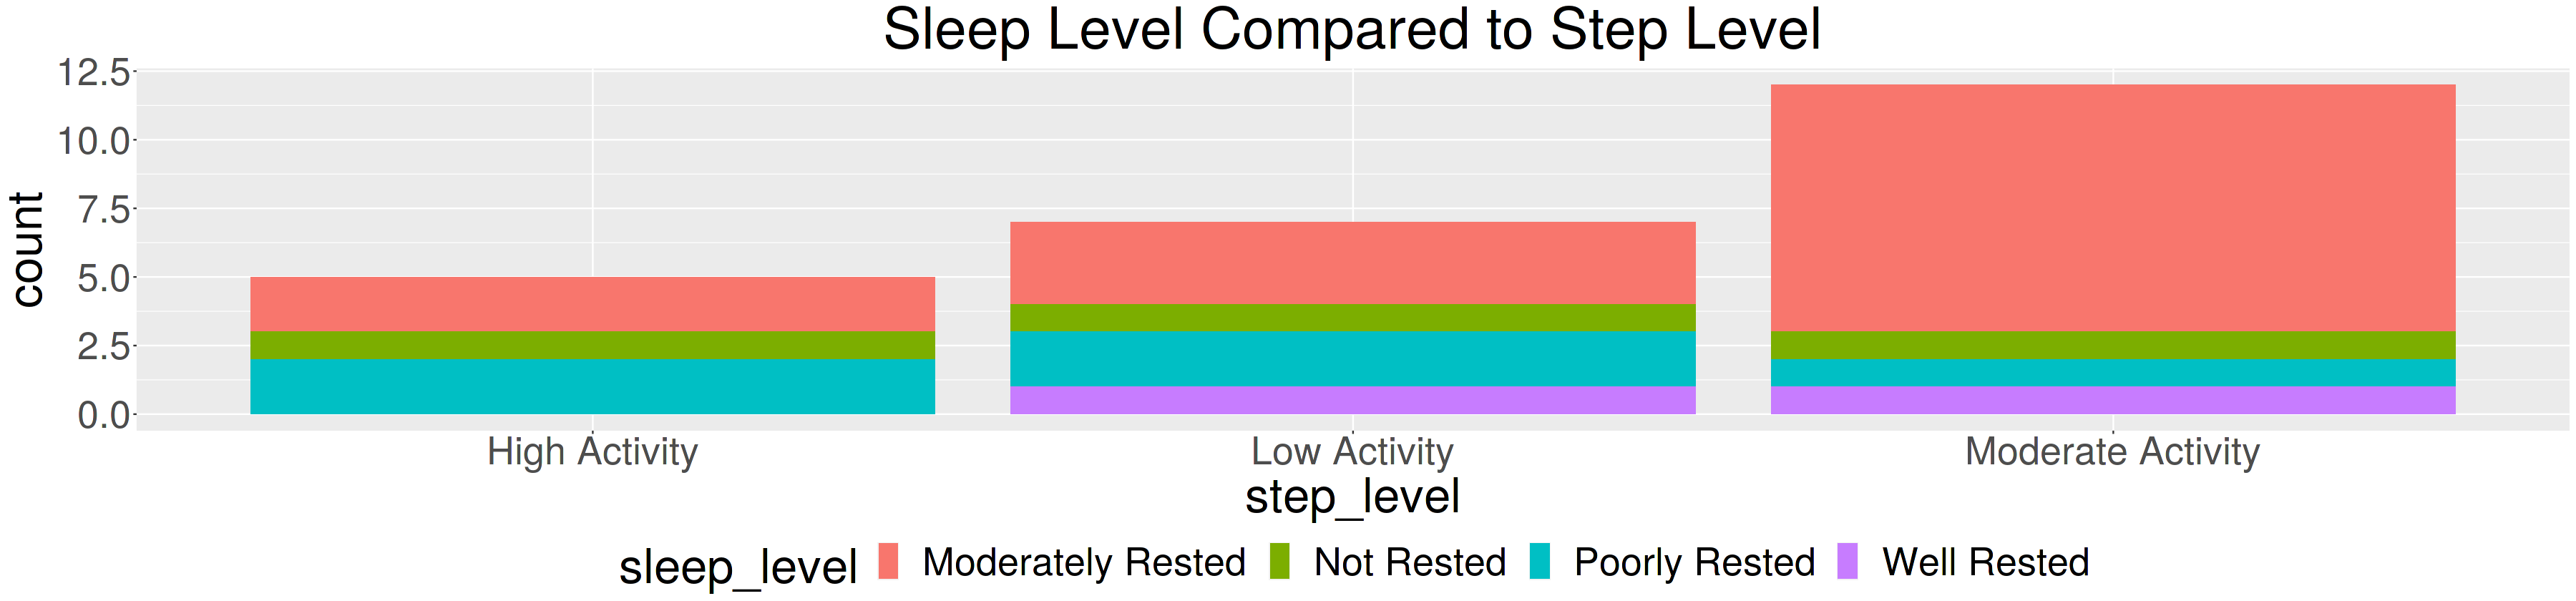

In [68]:
ggplot(data = sleep_steps) +
  geom_bar(mapping = aes(x=step_level, fill=sleep_level))+
  labs(title="Sleep Level Compared to Step Level") +
  theme(legend.position="bottom",text = element_text(size = 40),plot.title = element_text(hjust = 0.5))